https://www.kaggle.com/competitions/catch-me-if-you-can-intruder-detection-through-webpage-session-tracking2

https://www.kaggle.com/code/dlarionov/alice-finding-perfect-features

https://www.kaggle.com/code/ilyayushkov/good-features-bad-features-new-features

https://www.kaggle.com/code/smyrbdr/simple-but-useful-time-features-eda

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt

import pickle as pkl

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
train_df = pd.read_csv(r'train_sessions.csv')
test_df = pd.read_csv(r'test_sessions.csv')

In [4]:
train_df.shape

(253561, 22)

In [5]:
test_df.shape

(82797, 21)

In [6]:
with open(r'site_dic.pkl', 'rb') as file:
    site_dic = pkl.load(file)
    
site_dic_inv = {v:k for k,v in site_dic.items()}

In [7]:
time_cols = [f'time{i}' for i in range(1,11)]
site_cols = [f'site{i}' for i in range(1,11)]

In [8]:
for col in time_cols:
    train_df[col] = pd.to_datetime(train_df[col], format="%Y-%m-%d %H:%M:%S")
    test_df[col] = pd.to_datetime(test_df[col], format="%Y-%m-%d %H:%M:%S")    

In [9]:
train_df.sample(5)

,session_id,site1,time1,site2,time2,site3,time3,site4,time4,site5,time5,site6,time6,site7,time7,site8,time8,site9,time9,site10,time10,target
154191,154192,364,2014-02-26 09:39:36,360.0,2014-02-26 09:39:37,364.0,2014-02-26 09:39:37,363.0,2014-02-26 09:39:37,167.0,2014-02-26 09:39:37,362.0,2014-02-26 09:39:37,362.0,2014-02-26 09:39:38,363.0,2014-02-26 09:39:38,364.0,2014-02-26 09:39:38,360.0,2014-02-26 09:39:38,0
27442,27443,733,2014-03-04 10:40:23,733.0,2014-03-04 10:40:24,733.0,2014-03-04 10:40:27,733.0,2014-03-04 10:40:29,733.0,2014-03-04 10:40:30,733.0,2014-03-04 10:40:33,733.0,2014-03-04 10:40:34,733.0,2014-03-04 10:40:35,733.0,2014-03-04 10:40:36,733.0,2014-03-04 10:40:39,0
207038,207039,6095,2014-04-24 08:36:29,301.0,2014-04-24 08:36:29,29.0,2014-04-24 08:36:29,39.0,2014-04-24 08:36:29,35.0,2014-04-24 08:36:29,6094.0,2014-04-24 08:36:30,6095.0,2014-04-24 08:36:30,21.0,2014-04-24 08:36:41,23.0,2014-04-24 08:36:41,301.0,2014-04-24 08:36:44,0
215052,215053,55,2014-02-20 13:06:30,21.0,2014-02-20 13:06:31,23.0,2014-02-20 13:06:39,814.0,2014-02-20 13:06:40,677.0,2014-02-20 13:06:41,39.0,2014-02-20 13:06:43,22.0,2014-02-20 13:07:14,50.0,2014-02-20 13:07:26,570.0,2014-02-20 13:07:40,812.0,2014-02-20 13:08:39,0
172476,172477,145,2014-02-24 09:36:40,570.0,2014-02-24 09:36:42,45.0,2014-02-24 09:37:10,45.0,2014-02-24 09:37:13,145.0,2014-02-24 09:38:54,55.0,2014-02-24 09:39:05,56.0,2014-02-24 09:39:05,55.0,2014-02-24 09:39:06,55.0,2014-02-24 09:39:07,145.0,2014-02-24 09:40:50,0


In [10]:
def extract_date_features(df, date_column='time1'):
    
    #df['start_date'] = df[date_column].dt.date
    df['start_year'] = df[date_column].dt.year
    df['start_month'] = df[date_column].dt.month
    df['start_year_month'] = df[date_column].dt.strftime('%Y%m')
    df['start_week'] = df[date_column].dt.isocalendar().week
    df['start_day'] = df[date_column].dt.day
    df['start_weekday'] = df[date_column].dt.weekday
    df['start_is_weekend'] = df['start_weekday'].isin([5, 6]).astype(int)
    df['start_hour'] = df['time1'].dt.hour
    
    return df

In [11]:
train_df = extract_date_features(train_df)

In [12]:
def extract_session_times_features(df):
    
    df['session_len'] = df[time_cols].notna().sum(axis=1)
    df['session_duration'] = (df[time_cols].max(axis=1) - df[time_cols].min(axis=1)).dt.total_seconds()
    df['session_delta_mean'] = df[time_cols].diff(axis=1).mean(axis=1).dt.total_seconds().fillna(0)
    df['session_delta_std'] = df[time_cols].diff(axis=1).std(axis=1).dt.total_seconds().fillna(0)
    df['session_delta_min'] = df[time_cols].diff(axis=1).min(axis=1).dt.total_seconds().fillna(0)
    df['session_delta_max'] = df[time_cols].diff(axis=1).max(axis=1).dt.total_seconds().fillna(0)
    
    return df

In [13]:
train_df = extract_session_times_features(train_df)

In [14]:
train_df['time1'].min(), train_df['time1'].max()

(Timestamp('2013-01-12 08:05:57'), Timestamp('2014-04-30 23:39:53'))

In [15]:
train_df['target'].value_counts(1)

0    0.990941
1    0.009059
Name: target, dtype: float64

In [16]:
def show_count(df, x_axis):
    
    df_gr =  df.groupby([x_axis, 'target'], as_index=False)['session_id'].count()
    df_gr['sum'] = df_gr.groupby(['target'])['session_id'].transform('max')
    df_gr['ratio'] = df_gr['session_id'] / df_gr['sum']
    
    plt.figure(figsize=(10, 4))
    plt.title(x_axis, fontsize=20)
    sns.barplot(data=df_gr[df_gr['target']==0],
                x=x_axis, y='session_id', color='gray', ci=None)
    plt.xticks(rotation=30)
    plt.show()

    plt.figure(figsize=(10, 4))
    sns.barplot(data=df_gr[df_gr['target']==1],
                x=x_axis, y='session_id', color='indianred', ci=None)
    plt.xticks(rotation=30)
    plt.show()

    plt.figure(figsize=(10, 4))
    sns.barplot(data=df_gr,
                x=x_axis, y='ratio', hue='target', ci=None)
    plt.xticks(rotation=30)
    plt.show()

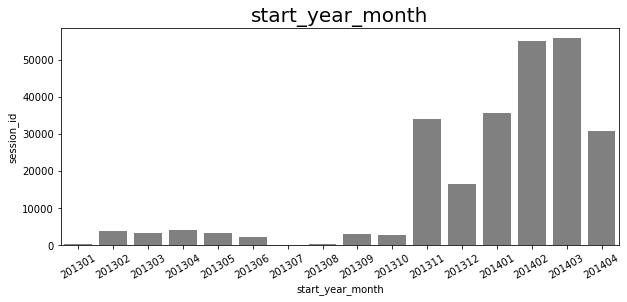

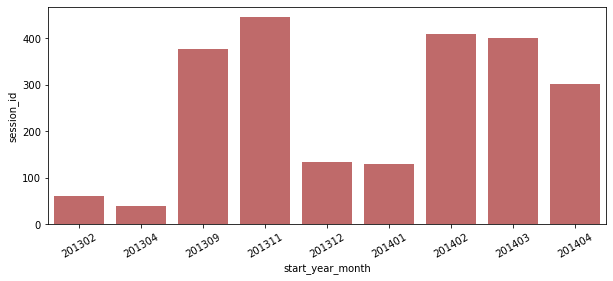

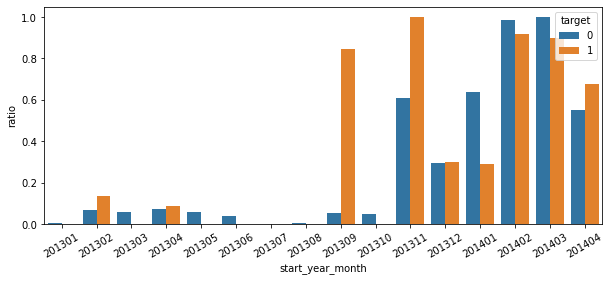

In [17]:
show_count(train_df, 'start_year_month')

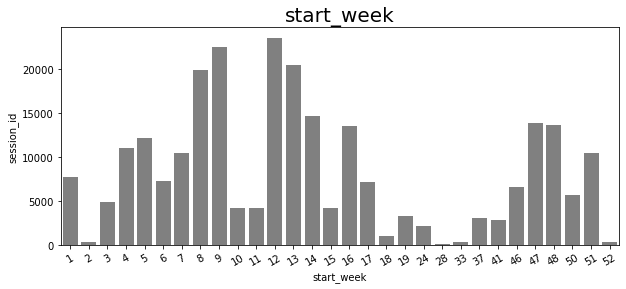

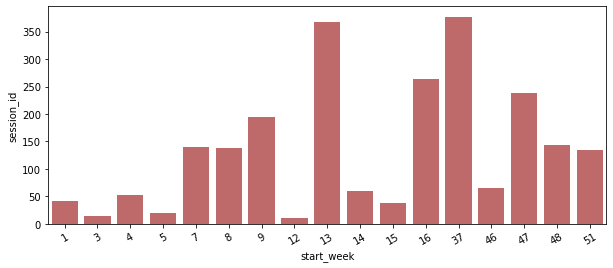

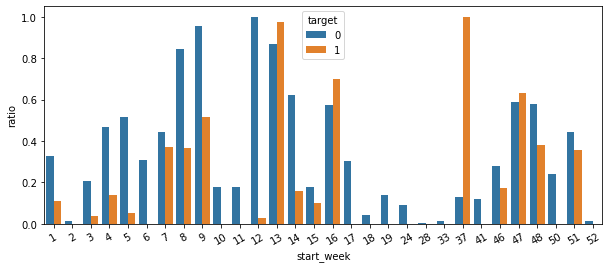

In [18]:
show_count(train_df, 'start_week')

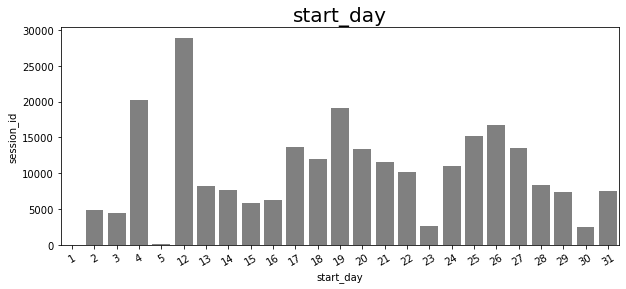

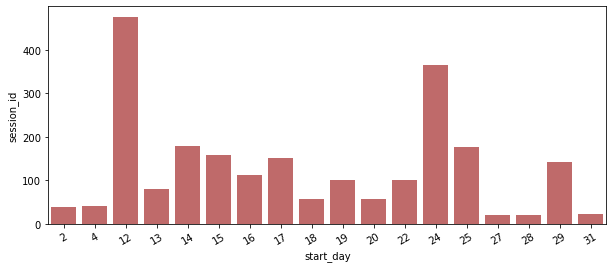

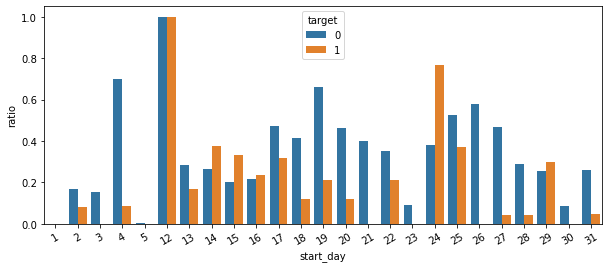

In [19]:
show_count(train_df, 'start_day')

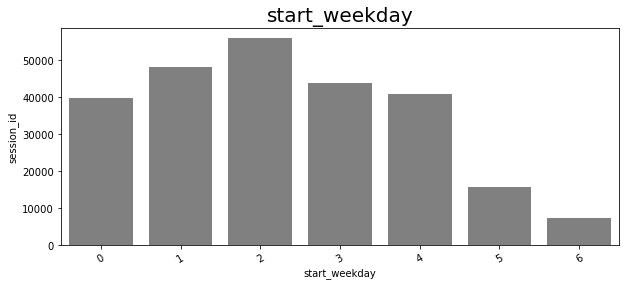

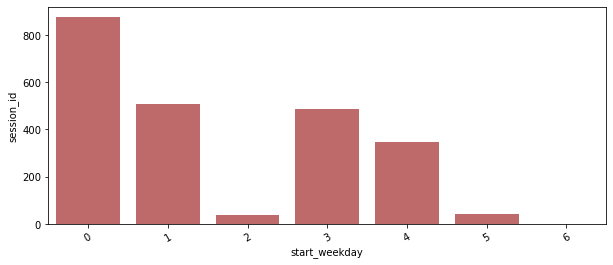

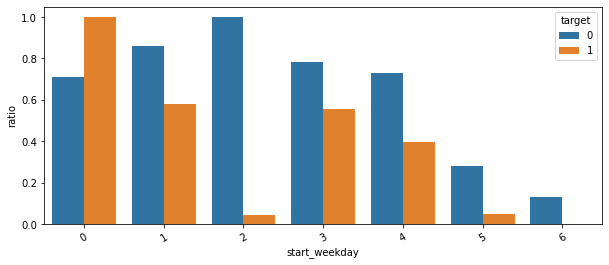

In [20]:
show_count(train_df, 'start_weekday')

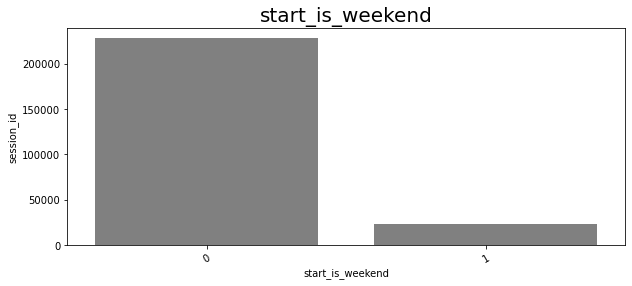

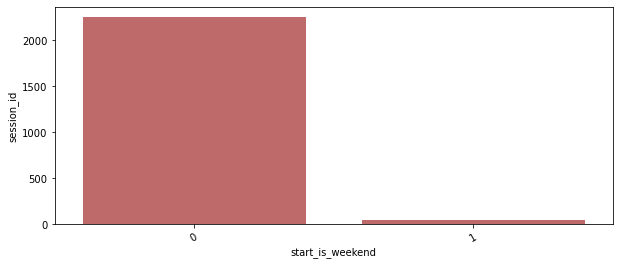

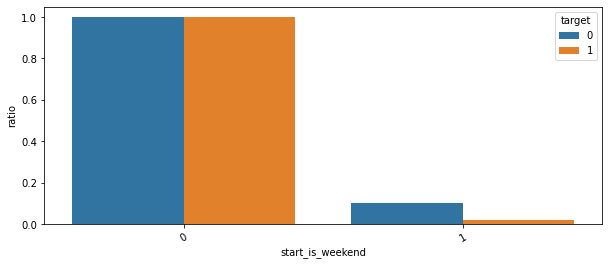

In [21]:
show_count(train_df, 'start_is_weekend')

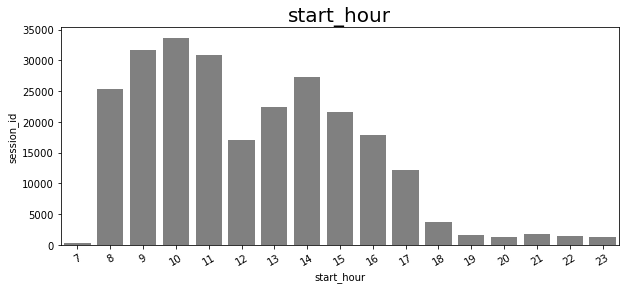

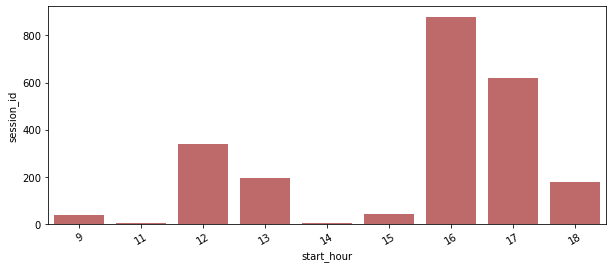

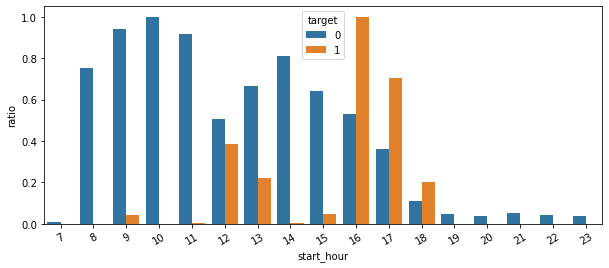

In [22]:
show_count(train_df, 'start_hour')

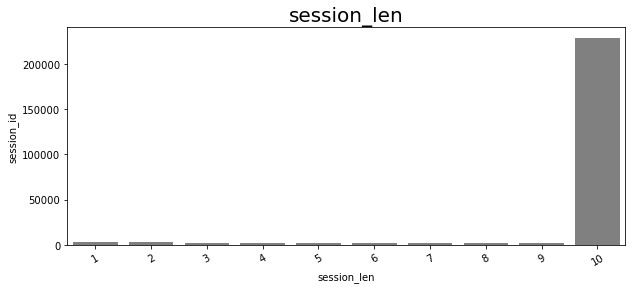

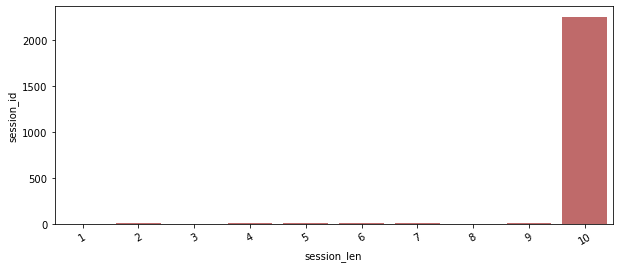

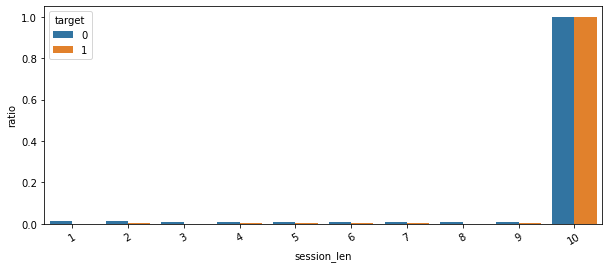

In [23]:
show_count(train_df, 'session_len')

In [24]:
train_df[train_df['target']==0][['session_len', 'session_duration', 'session_delta_mean',
          'session_delta_std', 'session_delta_min', 'session_delta_max']].describe().T

,count,mean,std,min,25%,50%,75%,max
session_len,251264.0,9.512350,1.742295,1.0,10.000000,10.000000,10.000000,10.000000
session_duration,251264.0,139.282372,296.653518,0.0,7.000000,28.000000,114.000000,1800.000000
session_delta_mean,251264.0,20.185155,64.501559,0.0,0.777778,3.200000,13.222222,1800.000000
session_delta_std,251264.0,31.703585,88.409530,0.0,0.726483,4.265495,18.283265,1269.963779
session_delta_min,251264.0,2.582025,42.086998,0.0,0.000000,0.000000,0.000000,1800.000000
session_delta_max,251264.0,87.492880,221.818016,0.0,2.000000,13.000000,55.000000,1800.000000


In [25]:
train_df[train_df['target']==1][['session_len', 'session_duration', 'session_delta_mean',
          'session_delta_std', 'session_delta_min', 'session_delta_max']].describe().T

,count,mean,std,min,25%,50%,75%,max
session_len,2297.0,9.912495,0.734720,1.0,10.000000,10.000000,10.000000,10.000000
session_duration,2297.0,52.296474,153.309014,0.0,4.000000,11.000000,38.000000,1763.000000
session_delta_mean,2297.0,6.406858,22.797499,0.0,0.444444,1.222222,4.222222,540.333333
session_delta_std,2297.0,11.146912,40.383271,0.0,0.666667,1.833333,6.300353,611.466271
session_delta_min,2297.0,0.343492,5.625740,0.0,0.000000,0.000000,0.000000,184.000000
session_delta_max,2297.0,31.801480,111.436888,0.0,2.000000,5.000000,18.000000,1746.000000


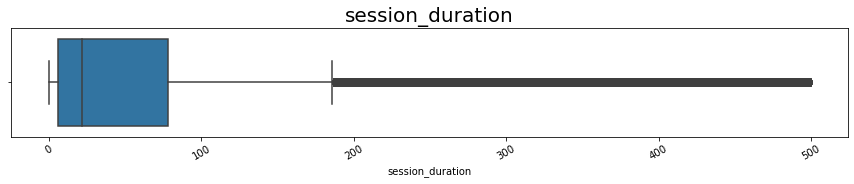

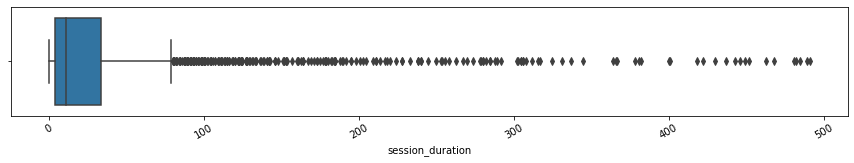

In [26]:
plt.figure(figsize=(15, 2))
plt.title('session_duration', fontsize=20)
sns.boxplot(data=train_df[(train_df['target']==0) & (train_df['session_duration']<500)] , x='session_duration')
plt.xticks(rotation=30)
plt.show()

plt.figure(figsize=(15, 2))
sns.boxplot(data=train_df[(train_df['target']==1) & (train_df['session_duration']<500)] , x='session_duration')
plt.xticks(rotation=30)
plt.show()

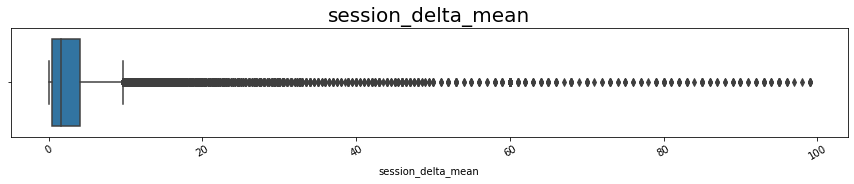

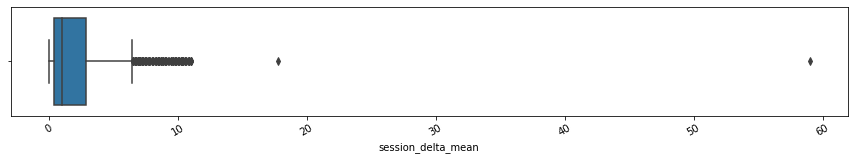

In [27]:
plt.figure(figsize=(15, 2))
plt.title('session_delta_mean', fontsize=20)
sns.boxplot(data=train_df[(train_df['target']==0) & (train_df['session_duration']<100)] , x='session_delta_mean')
plt.xticks(rotation=30)
plt.show()

plt.figure(figsize=(15, 2))
sns.boxplot(data=train_df[(train_df['target']==1) & (train_df['session_duration']<100)] , x='session_delta_mean')
plt.xticks(rotation=30)
plt.show()

In [28]:
train_df[site_cols] = train_df[site_cols].fillna(0)
site_dic_inv_s = pd.Series(site_dic_inv)

for col in site_cols:    
    site_dic_inv_s.name = col+'_name'
    train_df = train_df.merge(site_dic_inv_s, how='left', left_on=col, right_index=True, validate='m:1')

In [29]:
site_cols_names = [ col+'_name' for col in site_cols ]
train_df[site_cols_names] = train_df[site_cols_names].fillna('none.none')

In [30]:
df_sites = pd.DataFrame()

for col in site_cols_names:
    df_sites = pd.concat([df_sites,
                          train_df[[col, 'target']].rename(columns={col:'site_name'})],
                         ignore_index=True)
    
df_sites['cnt'] = 1

In [31]:
df_sites_piv = df_sites.pivot_table(index='site_name', columns='target', values='cnt',
                                    aggfunc='sum', fill_value=0).reset_index()

In [32]:
df_sites_piv['freq'] = df_sites_piv[1] / (df_sites_piv[0]+df_sites_piv[1])

In [33]:
# sires visit Alice
len(df_sites_piv[df_sites_piv[1]!=0]) / len(df_sites_piv)

0.02533532041728763

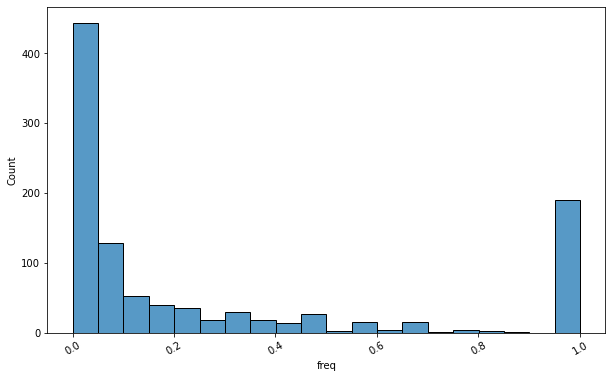

In [34]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_sites_piv[df_sites_piv[1]!=0], x='freq', bins=20)
plt.xticks(rotation=30)
plt.show()

In [35]:
df_sites['domain'] = df_sites['site_name'].str.split('.').str[-1]

In [36]:
df_sites_piv_domain = df_sites.pivot_table(index='domain', columns='target', values='cnt',
                                           aggfunc='sum', fill_value=0).reset_index()

In [37]:
df_sites_piv_domain['freq'] = df_sites_piv_domain[1] / (df_sites_piv_domain[0]+df_sites_piv_domain[1])

In [38]:
# sires visit Alice
len(df_sites_piv_domain[df_sites_piv_domain[1]!=0]) / len(df_sites_piv_domain)

0.167420814479638

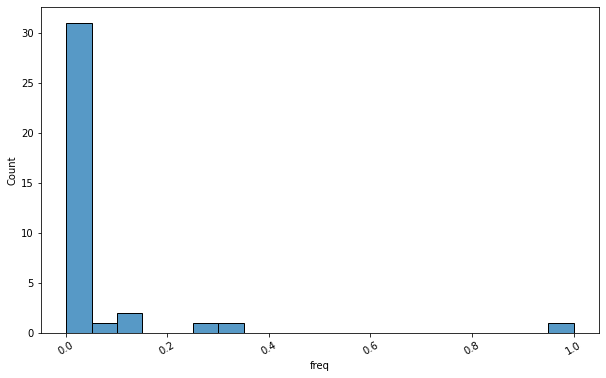

In [39]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_sites_piv_domain[df_sites_piv_domain[1]!=0], x='freq', bins=20)
plt.xticks(rotation=30)
plt.show()

In [71]:
df_sites['main_site'] = df_sites['site_name'].str.split('.').str[-2] + '.' + df_sites['site_name'].str.split('.').str[-1]

In [73]:
df_sites_piv_main_site = df_sites.pivot_table(index='main_site', columns='target', values='cnt',
                                           aggfunc='sum', fill_value=0).reset_index()

In [76]:
df_sites_piv_main_site['freq'] = df_sites_piv_main_site[1] / (df_sites_piv_main_site[0]+df_sites_piv_main_site[1])

In [75]:
# sires visit Alice
len(df_sites_piv_main_site[df_sites_piv_main_site[1]!=0]) / len(df_sites_piv_main_site)

0.03106283029947152

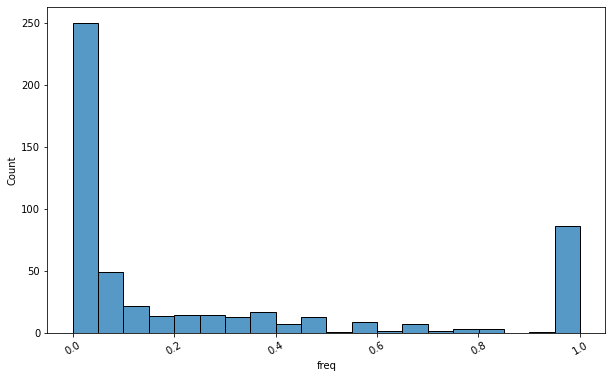

In [79]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_sites_piv_main_site[df_sites_piv_main_site[1]!=0], x='freq', bins=20)
plt.xticks(rotation=30)
plt.show()

In [47]:
test_domains = train_df[site_cols_names+['target']].copy()

In [48]:
test_domains['sites_nunique'] = test_domains[site_cols_names].nunique(axis=1)

test_domains['sites_len_mean'] = test_domains[site_cols_names].applymap(len).mean(axis=1)
test_domains['sites_len_std'] = test_domains[site_cols_names].applymap(len).std(axis=1)
test_domains['sites_len_min'] = test_domains[site_cols_names].applymap(len).min(axis=1)
test_domains['sites_len_max'] = test_domains[site_cols_names].applymap(len).max(axis=1)

In [51]:
test_domains[test_domains['target']==1].describe().T

,count,mean,std,min,25%,50%,75%,max
target,2297.0,1.000000,0.000000,1.0,1.00000,1.000000,1.000000,1.000000
sites_nunique,2297.0,6.126252,1.989890,1.0,5.00000,6.000000,8.000000,10.000000
sites_len_mean,2297.0,17.702307,3.588117,8.4,15.30000,17.200000,19.400000,35.600000
sites_len_std,2297.0,5.631240,3.465396,0.0,2.75681,4.718757,8.809717,16.547575
sites_len_min,2297.0,11.836308,2.474826,6.0,11.00000,12.000000,13.000000,32.000000
sites_len_max,2297.0,26.809752,7.964803,9.0,20.00000,24.000000,36.000000,54.000000


In [52]:
test_domains[test_domains['target']==0].describe().T

,count,mean,std,min,25%,50%,75%,max
target,251264.0,0.000000,0.000000,0.0,0.000000,0.00000,0.0000,0.000000
sites_nunique,251264.0,5.723514,2.424650,1.0,4.000000,6.00000,8.0000,10.000000
sites_len_mean,251264.0,17.293061,3.578092,6.0,15.000000,17.00000,19.0000,71.500000
sites_len_std,251264.0,4.029112,2.766360,0.0,2.233582,3.62859,5.2079,36.068453
sites_len_min,251264.0,12.738717,2.882134,4.0,11.000000,13.00000,14.0000,58.000000
sites_len_max,251264.0,24.098538,7.317071,6.0,19.000000,23.00000,27.0000,124.000000


In [59]:
test_domains[test_domains['target']==1].sample(5)

,site1_name,site2_name,site3_name,site4_name,site5_name,site6_name,site7_name,site8_name,site9_name,site10_name,target,sites_nunique,sites_len_mean,sites_len_std,sites_len_min,sites_len_max
221327,betacie.cachefly.net,twitter.com,ad.publicidees.com,www.facebook.com,graph.facebook.com,none.none,none.none,none.none,none.none,none.none,1,6,12.8,4.613988,9,20
175131,static.flickr.com,www.facebook.com,www.facebook.com,static.flickr.com,static.flickr.com,static.flickr.com,www.a2micile.com,www.google.fr,www.google.fr,www.info-jeunes.net,1,5,16.1,1.852926,13,19
213352,clients1.google.fr,www.google.fr,www.google.fr,www.google.fr,www.google.fr,www.google.fr,www.google.fr,www.google.fr,www.google.fr,www.google.fr,1,2,13.5,1.581139,13,18
208892,r4---sn-gxo5uxg-jqbe.googlevideo.com,s.youtube.com,www.youtube.com,i1.ytimg.com,r4---sn-gxo5uxg-jqbe.googlevideo.com,s.youtube.com,s.youtube.com,i1.ytimg.com,r4---sn-gxo5uxg-jqbe.googlevideo.com,s.ytimg.com,1,5,19.7,11.294541,11,36
212408,r3---sn-gxo5uxg-jqbe.googlevideo.com,r3---sn-4g57kuer.googlevideo.com,i1.ytimg.com,www.youtube.com,s.youtube.com,s.youtube.com,r3---sn-gxo5uxg-jqbe.googlevideo.com,s.ytimg.com,r3---sn-4g57kuer.googlevideo.com,r3---sn-gxo5uxg-jqbe.googlevideo.com,1,6,23.6,11.520031,11,36


In [ ]:
что есть

дата время
день недели месяца года
месяц год
время, час
длительность

сайт
длинна
домен
популярность
повторяемость
TfidfVectorizer
первый / последний сайт
длинна наименования сайта
популярность сайтов у алис

дата-время актувности элис

In [ ]:
модель 1 - на числовых даннных
модель 2 - на различных сайтах (TfidfVectorizer)